# Lesson 7 - Method of Images

In [33]:
# import resource notebook
%run resources.ipynb

In [34]:
# create mesh grid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x, y = np.linspace(x_start, x_end, N), np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

## Source near a plane wall

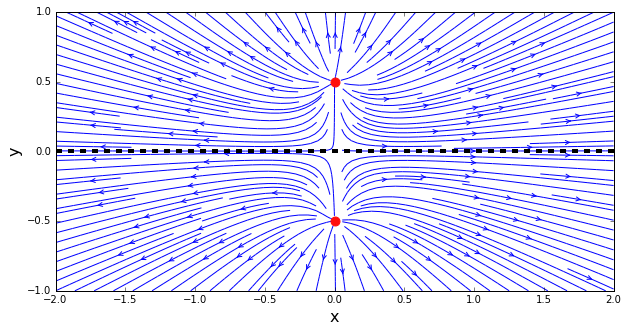

In [35]:
# create a source
strength_source = 1.0
x_source, y_source = 0.0, 0.5

source = SourceSink(strength_source, x_source, y_source)

source.velocity(X, Y)
source.stream_function(X, Y)

# create the image of the source
source_image = SourceSink(strength_source, x_source, -y_source)

source_image.velocity(X, Y)
source_image.stream_function(X, Y)

# superposition
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

# plot
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(source.x, source.y, color='#FF0D0D', s=80, marker='o')
plt.scatter(source_image.x, source_image.y, color='#FF0D0D', s=80, marker='o')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

## Vortex near a plane wall

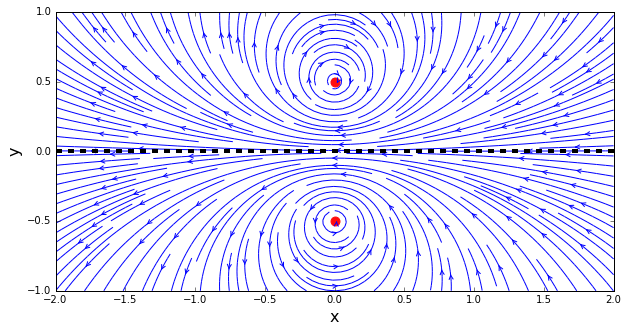

In [36]:
# create vortex
strength_vort = 1.0
x_vort, y_vort = 0.0, 0.5

vort = Vortex(strength_vort, x_vort, y_vort)

vort.velocity(X, Y)
vort.stream_function(X, Y)

# create image
vort_image = Vortex(-strength_vort, x_vort, -y_vort)

vort_image.velocity(X, Y)
vort_image.stream_function(X, Y)

# superposition
u = vort.u + vort_image.u
v = vort.v + vort_image.v
psi = vort.psi + vort_image.psi

# plot
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vort.x, vort.y, color='#FF0D0D', s=80, marker='o')
plt.scatter(vort_image.x, vort_image.y, color='#FF0D0D', s=80, marker='o')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

## Motion of a vortex pair near the ground

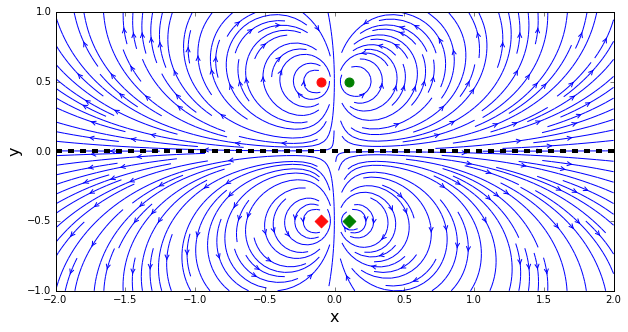

In [37]:
x_vort1, y_vort1 = -0.1, 0.5
x_vort2, y_vort2 = 0.1, 0.5

# create vortex pair
vort1 = Vortex(strength_vort, x_vort1, y_vort1)
vort2 = Vortex(-strength_vort, x_vort2, y_vort2)

# compute velocity field and stream functions
vort1.velocity(X, Y)
vort1.stream_function(X, Y)

vort2.velocity(X, Y)
vort2.stream_function(X, Y)

# create images
vort1_image = Vortex(-strength_vort, x_vort1, -y_vort1)
vort2_image = Vortex(strength_vort, x_vort2, -y_vort2)

vort1_image.velocity(X, Y)
vort1_image.stream_function(X, Y)

vort2_image.velocity(X, Y)
vort2_image.stream_function(X, Y)

# superposition
u = vort1.u + vort2.u + vort1_image.u + vort2_image.u
v = vort1.v + vort2.v + vort1_image.v + vort2_image.v
psi = vort1.psi + vort2.psi + vort1_image.psi + vort2_image.psi

# plot
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vort1.x, vort1.y, color='#FF0D0D', s=80, marker='o')
plt.scatter(vort2.x, vort2.y, color='g', s=80, marker='o')
plt.scatter(vort1_image.x, vort1_image.y, color='#FF0D0D', s=80, marker='D')
plt.scatter(vort2_image.x, vort2_image.y, color='g', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

## Doublet near a plane wall parallel to a uniform flow

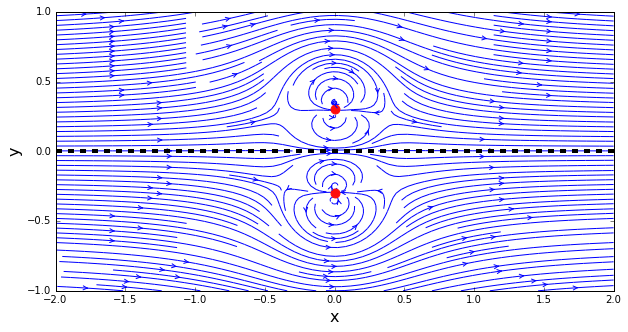

In [38]:
u_inf = 1.0

# create freestream calculate the freestream velocity and stream function
fs = Freestream(u_inf, 0.0)

fs.velocity(X, Y)
fs.stream_function(X, Y)

strength_dub = 1.0
x_dub, y_dub = 0.0, 0.3

# create doublet
dub = Doublet(strength_dub, x_dub, y_dub)

# calculate velocity field and streamfunction
dub.velocity(X, Y)
dub.stream_function(X, Y)

# create doublet image
dub_image = Doublet(strength_dub, x_dub, -y_dub)

dub_image.velocity(X, Y)
dub_image.stream_function(X, Y)

# superposition
u = fs.u + dub.u + dub_image.u
v = fs.v + dub.v + dub_image.v
psi = fs.psi + dub.psi + dub_image.psi

# plot
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(dub.x, dub.y, color='#FF0D0D', s=80, marker='o')
plt.scatter(dub_image.x, dub_image.y, color='#FF0D0D', s=80, marker='o')
plt.axhline(0., color='k', linestyle='--', linewidth=4);